<h1 align="center"> Sensordatenfusion Tutorium 01 </h1>

<h3 align="center"> Generieren von Groundtruth und Messungen </h3>

<h3 align="center"> Vorerst einige Imports und das erstellen der Ausgabe </h3>

In [5]:
import math
%matplotlib inline

from datetime import datetime

import numpy as np

<h3 align="center"> Jetzt die Parameter für Groundtruth festlegen </h3>


In [6]:
velocity = 300.0
acceleration = 9.0
omega = acceleration / ( 2 * velocity)
A = (velocity**2) / acceleration

<h3 align="center"> Nun wird die Groundtruth erstellt </h3>

In [7]:
from matplotlib import pyplot as plt
figure = plt.figure(figsize=(16, 9))
ax = figure.add_subplot(1, 1, 1)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

from stonesoup.types.groundtruth import GroundTruthPath, GroundTruthState

truth = GroundTruthPath()
start_time = datetime.now()

for t in range(math.ceil((2 * math.pi) / omega)):
    x = A * np.sin(omega * t)
    y = A * np.sin(2 * omega * t)
    truth.append(GroundTruthState(np.array([[x], [y]]), timestamp=t))

ax.plot([state.state_vector[0, 0] for state in truth], 
        [state.state_vector[1, 0] for state in truth], 
        linestyle="--", color="grey")

<h3 align="center"> Jetzt werden die Messungen generiert </h3>

[[2500, 0], [0, 2500]]


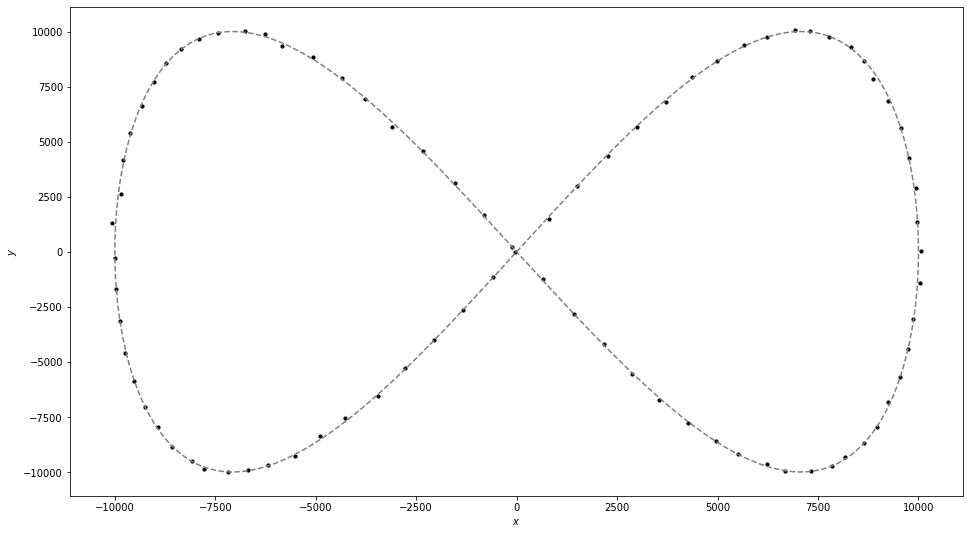

In [8]:
from stonesoup.types.detection import Detection

measurements = []
for state in truth:
    if state.timestamp % 5 == 0:
        x = state.state_vector[0, 0]
        y = state.state_vector[1, 0]
        
        mean = [x, y]
        cov = [[2500, 0], [0, 2500]]
        xDet, yDet = np.random.multivariate_normal(mean, cov)
        
        measurements.append(Detection(np.array([[xDet], [yDet]]), timestamp=state.timestamp))
    
print(cov)
# Messungen plotten
ax.scatter([state.state_vector[0, 0] for state in measurements], 
           [state.state_vector[1, 0] for state in measurements], 
           color='black', s = 10)
figure
